<a href="https://colab.research.google.com/github/a-nagar/vistra-beginner/blob/main/Lecture4_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

Decision Tree is an intuitive classification method that splits the nodes with the aim of decreasing "impurity", defined in terms of entropy or Gini index, of each node. The attribute which leads to greatest reduction in entropy (also called information gain) is the one that is used for split selection.

Let us consider the heart disease dataset

In [54]:
import pandas as pd

diabetes = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
X = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [58]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [59]:
import sklearn
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)


In [60]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred)) # predictions contain predicted values (derived from probability with 0.5 threshold)

print('Accuracy: ', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.73      0.73      0.73        26

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77

Accuracy:  0.8181818181818182


In [61]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

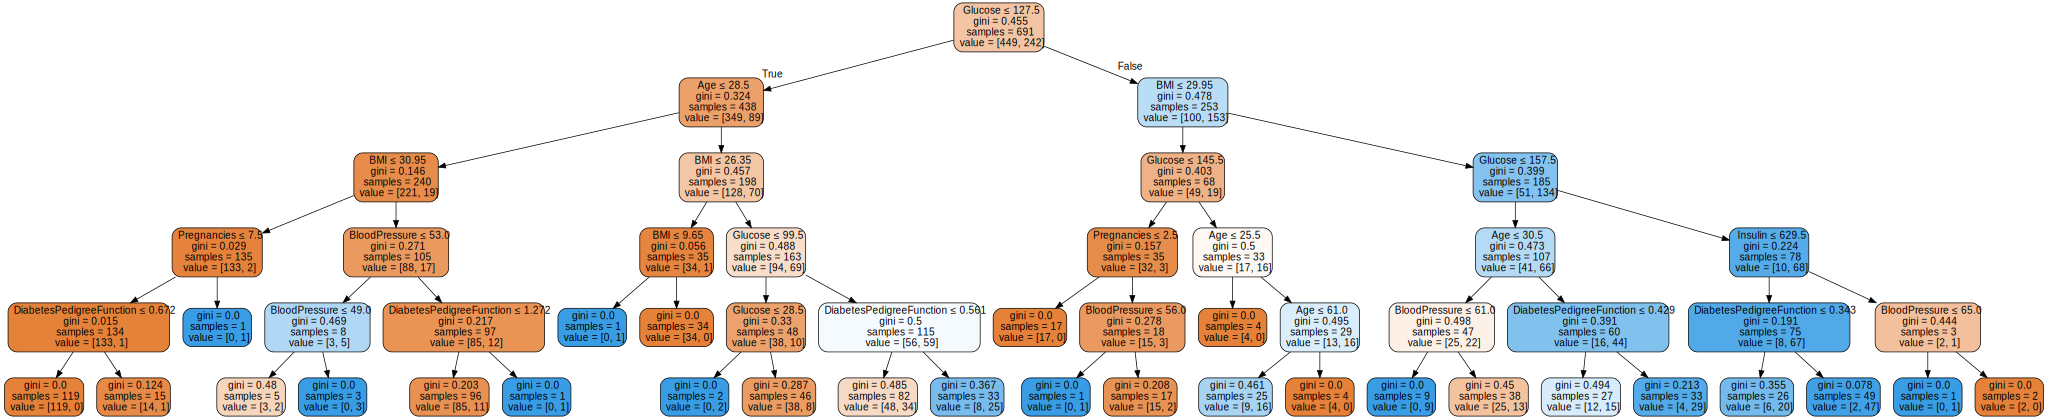

In [63]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,    
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# What knowledge can you find from above tree model and graph?

- Which feature is most important in separating classes?
- What do you observe about the leaf nodes? Do they have sufficient data items? What about Gini index?
- What about depth of the tree? Can we change that to make the accuracy better?

## Application on Heart Disease Dataset

In [79]:
heart = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/heart.csv")

In [80]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [81]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# What do you observe?

There are numerical as well as categorical columns. Can we use categorical variables as is? Probably not.

Let us use try to convert categorical to numerical (sometimes called index) variables.

In [82]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'Oldpeak', 'ExerciseAngina', 'ST_Slope']

In [83]:
from sklearn.preprocessing import LabelEncoder
heart[cat_cols] = heart[cat_cols].apply(LabelEncoder().fit_transform)

In [84]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,10,2,0
1,49,0,2,160,180,0,1,156,0,20,1,1
2,37,1,1,130,283,0,2,98,0,10,2,0
3,48,0,0,138,214,0,1,108,1,25,1,1
4,54,1,2,150,195,0,1,122,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,22,1,1
914,68,1,0,144,193,1,1,141,0,42,1,1
915,57,1,0,130,131,0,1,115,1,22,1,1
916,57,0,1,130,236,0,0,174,0,10,1,1


In [85]:
X = heart.drop('HeartDisease', axis = 1)
y = heart['HeartDisease']

In [86]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,10,2
1,49,0,2,160,180,0,1,156,0,20,1
2,37,1,1,130,283,0,2,98,0,10,2
3,48,0,0,138,214,0,1,108,1,25,1
4,54,1,2,150,195,0,1,122,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,22,1
914,68,1,0,144,193,1,1,141,0,42,1
915,57,1,0,130,131,0,1,115,1,22,1
916,57,0,1,130,236,0,0,174,0,10,1


In [87]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [89]:
import sklearn
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

In [90]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred)) # predictions contain predicted values (derived from probability with 0.5 threshold)

print('Accuracy: ', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.90      0.83      0.86        52

    accuracy                           0.85        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.85      0.85      0.85        92

Accuracy:  0.8478260869565217


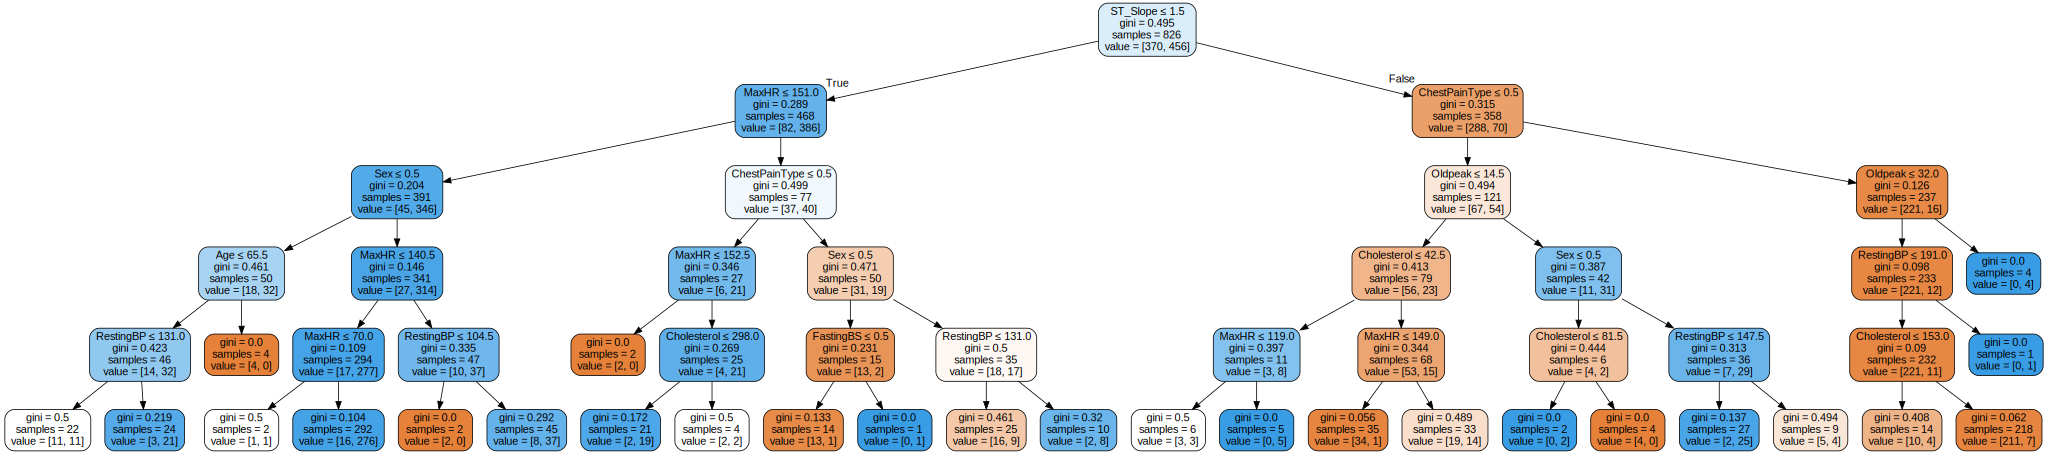

In [91]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,    
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Exercise:

Choose a dataset of your choice and apply classification tree on it.
What do you observe? Change parameters to obtain the best possible accuracy

### Application on Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
type(cuisines_label_df)

pandas.core.series.Series

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

[Text(0.4973958333333333, 0.9166666666666666, 'X[112] <= 0.5\ngini = 0.8\nsamples = 2796\nvalue = [537, 566, 565, 559, 569]'),
 Text(0.2916666666666667, 0.75, 'X[290] <= 0.5\ngini = 0.786\nsamples = 2311\nvalue = [534, 236, 563, 557, 421]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[185] <= 0.5\ngini = 0.786\nsamples = 2144\nvalue = [530, 236, 561, 397, 420]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[334] <= 0.5\ngini = 0.78\nsamples = 2000\nvalue = [526, 224, 551, 397, 302]'),
 Text(0.041666666666666664, 0.25, 'X[68] <= 0.5\ngini = 0.783\nsamples = 1787\nvalue = [368, 223, 538, 366, 292]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.753\nsamples = 1371\nvalue = [310, 142, 518, 196, 205]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.73\nsamples = 416\nvalue = [58, 81, 20, 170, 87]'),
 Text(0.125, 0.25, 'X[95] <= 0.5\ngini = 0.423\nsamples = 213\nvalue = [158, 1, 13, 31, 10]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.391\nsamples = 2

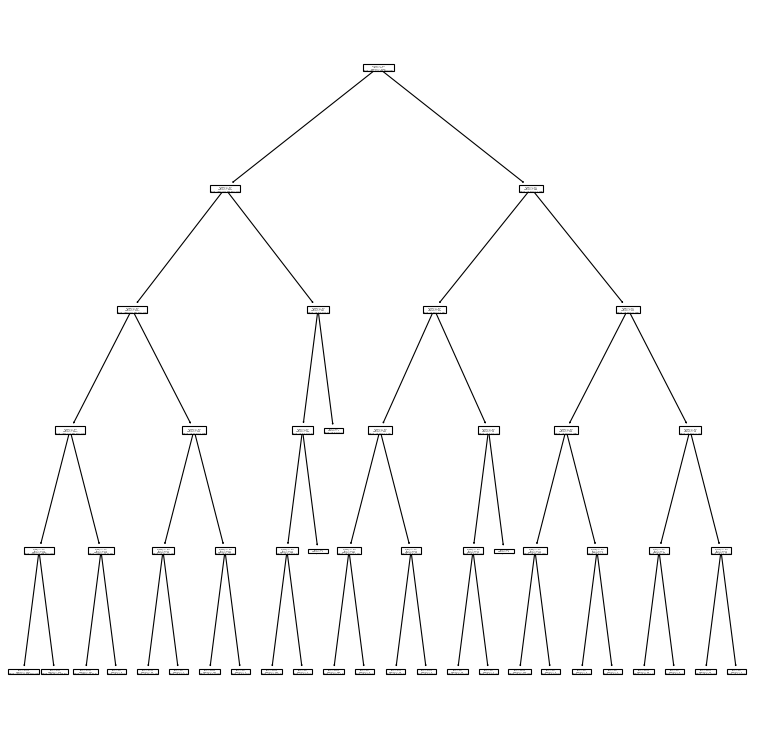

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

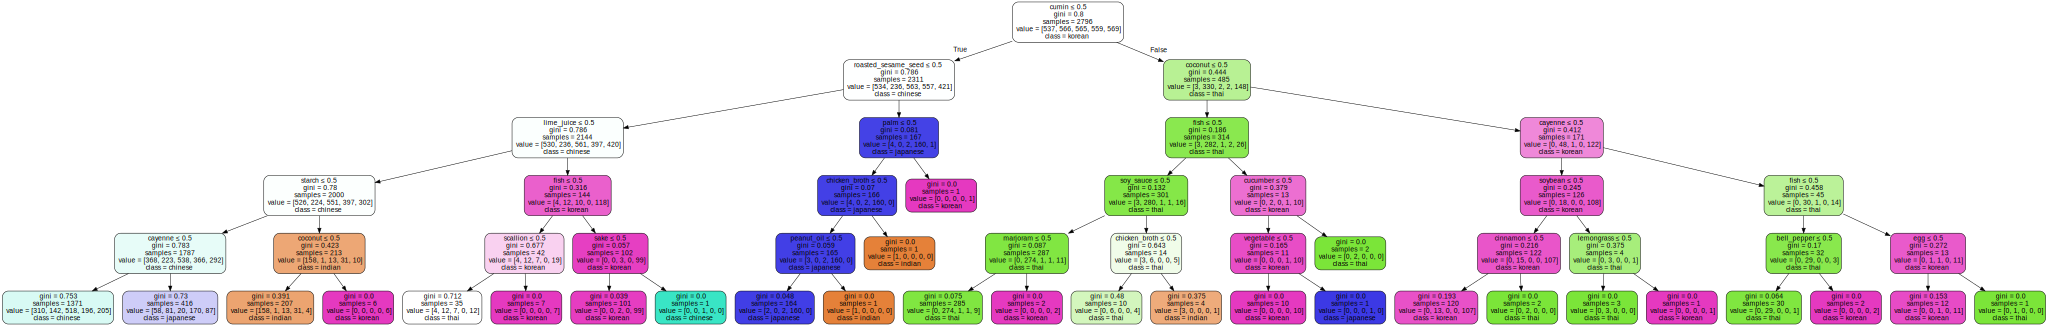

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cuisines_feature_df.columns,  
                     class_names=cuisine_labels_distinct,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.82      0.31      0.44       262
      indian       0.81      0.57      0.67       233
    japanese       0.37      0.88      0.52       234
      korean       0.58      0.60      0.59       240
        thai       0.83      0.44      0.58       230

    accuracy                           0.55      1199
   macro avg       0.68      0.56      0.56      1199
weighted avg       0.68      0.55      0.56      1199



In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.82      0.47      0.60       262
      indian       0.76      0.84      0.80       233
    japanese       0.47      0.81      0.59       234
      korean       0.76      0.69      0.72       240
        thai       0.83      0.60      0.69       230

    accuracy                           0.68      1199
   macro avg       0.72      0.68      0.68      1199
weighted avg       0.73      0.68      0.68      1199



In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
X = cars[['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'size']]

In [ ]:
y = cars['origin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

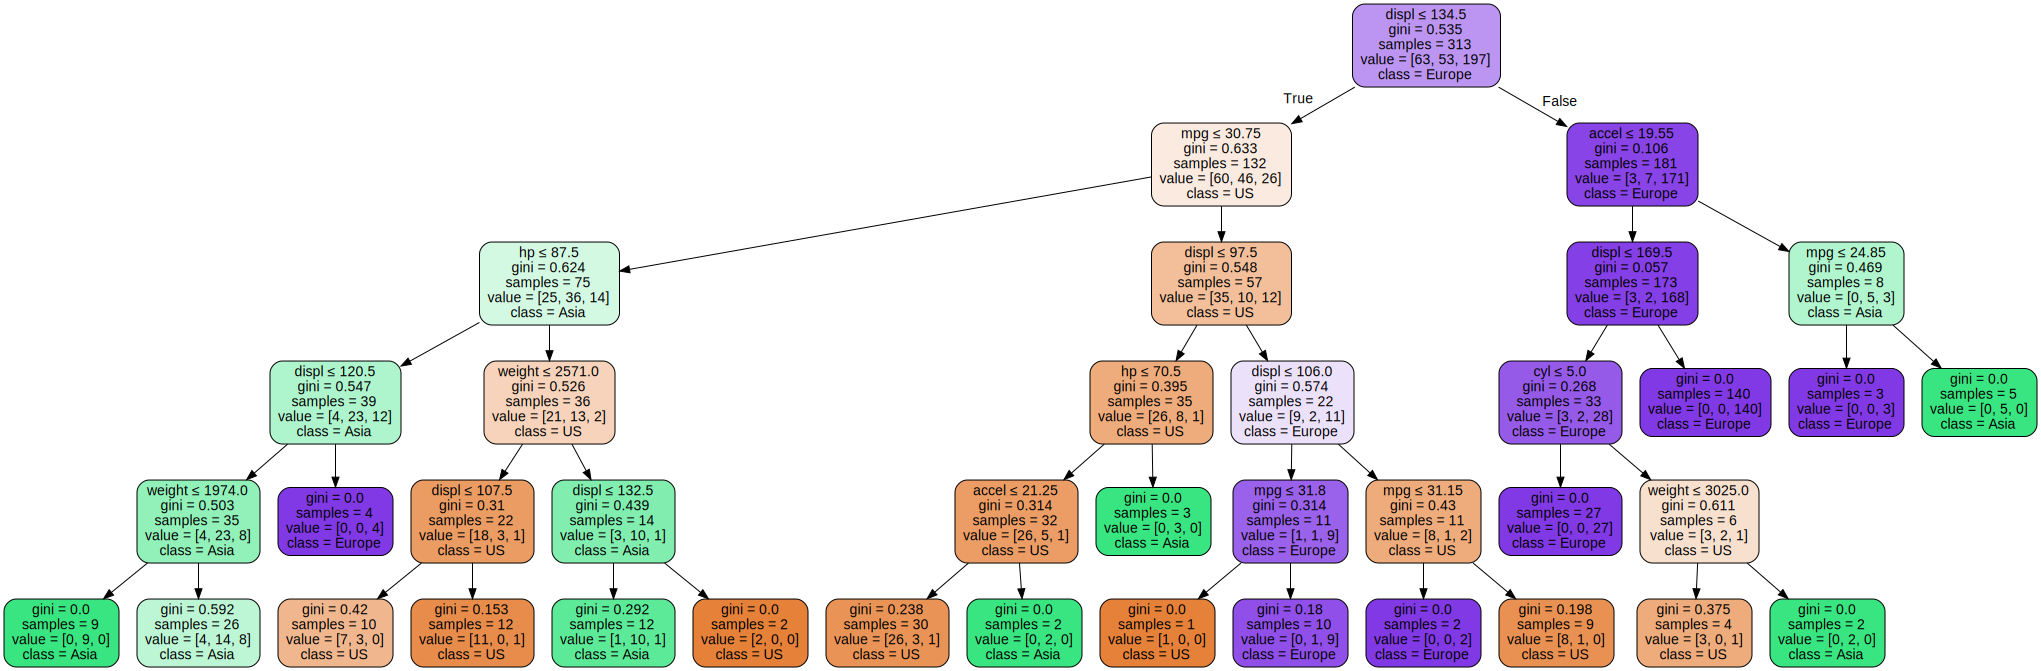

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Asia       0.74      0.88      0.80        16
      Europe       0.60      0.60      0.60        15
          US       0.91      0.85      0.88        48

    accuracy                           0.81        79
   macro avg       0.75      0.78      0.76        79
weighted avg       0.82      0.81      0.81        79

